In [1]:
import sys, os
from pathlib import Path
# 1) Asegúrate de apuntar a la raíz del proyecto
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
import pandas as pd
from IPython.display import display
# Cargar el archivo Parquet
data_local = pd.read_parquet(r'..\data\raw\BTCUSDT_1h_2024-01-01_2024-07-01.parquet')

In [5]:
# Convertir la columna 'timestamp' a un formato datetime
data_local['datetime'] = pd.to_datetime(data_local['timestamp'], unit='ms', utc=True)
# Establecer 'datetime' como índice
data_local.set_index('datetime', inplace=True)
# Asegurarse de que las columnas sean numéricas (float)
data_local[['open', 'high', 'low', 'close', 'volume']] = data_local[['open', 'high', 'low', 'close', 'volume']].apply(pd.to_numeric, errors='coerce')
# Agregar una columna que enumere la cantidad de filas (contador incremental desde 1)
data_local['row_count'] = range(1, len(data_local) + 1)
# Redondear las columnas 'open', 'high', 'low', 'close', 'volume' a dos decimales
data_local[['row_count','open', 'high', 'low', 'close', 'volume']] = data_local[['row_count','open', 'high', 'low', 'close', 'volume']].round(1)

# Mostrar los primeros registros de forma más clara
display(
    data_local[['row_count','open', 'high', 'low', 'close', 'volume']]
    .head(100)
    .style
    .format("{:.2f}")
    .set_properties(**{"text-align": "center"})
    .highlight_null("lightgray")
    .set_table_styles([
        {"selector": "th", "props": [("font-size", "110%"), ("text-align", "center")]}
    ])
)

C:\Users\DELL-LATITUDE\AppData\Local\Temp\ipykernel_5252\171813291.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data_local['datetime'] = pd.to_datetime(data_local['timestamp'], unit='ms', utc=True)


,row_count,open,high,low,close,volume
datetime,,,,,,
2024-01-01 00:00:00+00:00,1.00,42313.00,42597.00,42289.00,42503.00,99860301.00
2024-01-01 01:00:00+00:00,2.00,42503.00,42824.00,42462.00,42647.00,106721170.00
2024-01-01 02:00:00+00:00,3.00,42647.00,42676.00,42532.00,42620.00,55541186.00
2024-01-01 03:00:00+00:00,4.00,42620.00,42629.00,42275.00,42369.00,96618126.00
2024-01-01 04:00:00+00:00,5.00,42369.00,42439.00,42237.00,42431.00,75869554.00
2024-01-01 05:00:00+00:00,6.00,42431.00,42439.00,42210.00,42272.00,50556030.00
2024-01-01 06:00:00+00:00,7.00,42272.00,42461.00,42239.00,42423.00,48245017.00
2024-01-01 07:00:00+00:00,8.00,42423.00,42535.00,42421.00,42531.00,52907177.00
2024-01-01 08:00:00+00:00,9.00,42531.00,42597.00,42492.00,42588.00,47976096.00


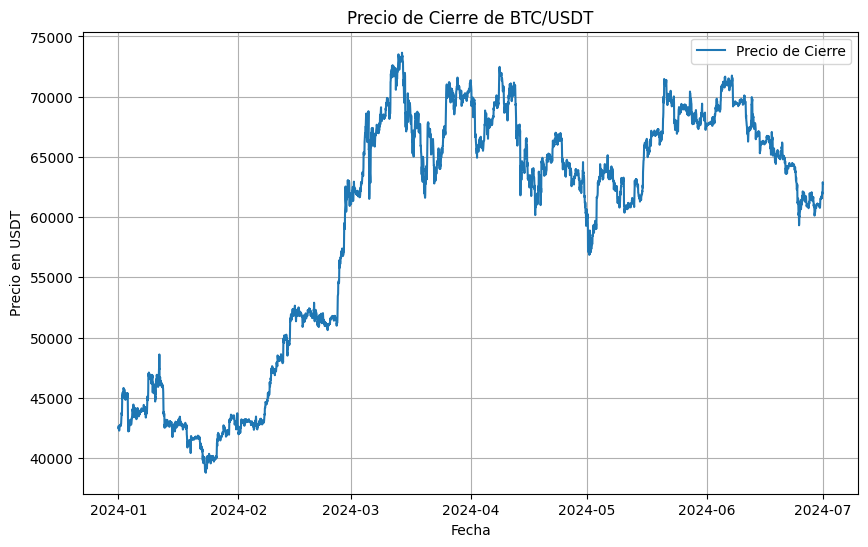

In [4]:
# Graficar los datos crudos
import matplotlib.pyplot as plt
# Graficar los precios de cierre
plt.figure(figsize=(10, 6))
plt.plot(data_local.index, data_local['close'], label='Precio de Cierre')
plt.title('Precio de Cierre de BTC/USDT')
plt.xlabel('Fecha')
plt.ylabel('Precio en USDT')
plt.legend()
plt.grid(True)
plt.show()